<a href="https://colab.research.google.com/github/gabrielasenareis/Portfolio/blob/main/Projeto_2_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUMO DO PROJETO**

# Declaração do Problema

Esse dataframe contém dados de clientes de uma operadora de TV a cabo, como idade, sexo, tipo de plano escolhido etc. Meu objetivo nesse projeto é criar um modelo de machine learning para prever o cancelamento de assinaturas desses clientes.

# Descrição das Variáveis

**Variáveis numéricas:**

*   **ID_CLIENTE**: Número de identificação de cada cliente.                       
*   **IDADE_CLIENTE**: Idade do cliente.                  
*   **QT_FILHOS**: Quantidade de filhos de cada cliente.                         
*   **DIAS_ATIVO**: Quantidade de dias como cliente ativo.                       
*   **MESES_ATIVO**: Quantidade de mêses como cliente ativo.                  
*   **VL_PLANO_ADESAO**: Valor do plano no momento de adesão.        
*   **VL_PLANO_ATUAL**: Valor atual do plano.         
*   **QT_PONTOS_INSTALADOS**: Quantidade de pontos de Tv a cabo instalados por cliente.
*   **QT_PC_PAGA**S: Quantidade de parcelas já pagas.                      
*   **QT_PC_VENCIDAS**: Quantidade de parcelas vencidas.                
*   **QT_PC_PAGA_ATRASO**: Quantidade de parcelas pagas em atraso.       
*   **QT_PC_PAGA_EM_DIA**: Quantidade de parcelas pagas em dia.      
*   **QT_ACORDO_PAGAMENTO**: Quantidade de acordos para pagamentos.
*   **VL_MENSALIDADE_ATRASO:** Valor de mensalidade em atraso.
*   **VL_MENSALIDADE_DT_AQUISICAO**: Valor da mensalidade na data de adesão.
*   **VL_MENSALIDADE_DT_ATUAL**: Valor atual da mensalidade.          
*   **COD_SITUACAO**: Situação do cliente, se está ativo ou inativo. Porém essa variável já está codificada.

**Variáveis categóricas:**

*   **FORMA_AQUISICAO**: A forma de aquisição do plano, se foi pelo site ou por um vendedor.
*   **SEXO**: O sexo de cada cliente.
*   **DT_AQUISICAO**: Data de aquisição do plano.
*   **DT_CANCELAMENTO**: Data de cancelamento do plano.
*   **DURACAO_CONTRATO:** Duração do contrato.
*   **NOME_PRODUTO**: Nome do plano escolhido.
*   **SITUACAO**: Situação do cliente, se está ativo ou inativo.


# Para alcançar esse objetivo segui os seguintes passos:

**1.  Análise Exploratória de Dados (EDA):**

*  **Análise de Váriáveis:**

  Explorei os dados para verificar a presença de valores nulos e duplicados. Verifiquei também se os dados categóricos e numéricos estavam sendo lidos no dataset de acordo com seu tipo. Explorei as variáveis numéricas pra observar se existia algum valor fora do padrão. Explorei também as variáveis categóricas para verificar presença de valores sujos.
    

*  **Análise Bivariada:**
  *  Plotei gráficos com a relação das variáveis com a variável alvo "Situação" para observar a correlação dessas variáveis.
  

*   **Outliers:**

   Através da plotagem de boxplot observei se existia a presença de outliers no conjunto de dados.



**2.  Limpeza e Tratamento dos Dados:**

*  **Tratamento de Valores Outliers:**

  *  Tratei os valores outliers presentes na coluna "QT_FILHOS" , "QT_PC_PAGA_EM_DIA" e "QT_PC_PAGAS"

  *  Os valores outliers presentes em outras colunas não são outliers reais, pois estão dentro dos valores aceitáveis do contexto de valores de planos e duração dos planos.


*  **Tratamento de Valores Ausentes:**

  *  Após tratar os valores outliers, preenchi os valores ausentes na coluna "QT_FILHOS" com a média da coluna.
  *  Os valores ausentes na coluna "DT_CANCELAMENTO" não são valores ausentes reais, como essa coluna armazena apenas os valores de cancelamento, os valores "ausentes" são os dos clientes ativos.

*  **Exclusão de Colunas:**

  *  Dropei colunas que não ajudavam na melhora do modelo. Foram elas: 'DT_AQUISICAO','DT_CANCELAMENTO','SITUACAO'.

**3.  Codificação das Variáveis:**

  *  Os modelos de machine learning lidam apenas com dados numéricos, por isso utilizei label encoder para codificar as variáveis categóricas.

**4.  Balanceamento da Variável Target:**

  *  A variável target, que é a coluna de situação do cliente, informando seu status ativo ou cancelado, continha valores 'ativos' muito superiores ao 'cancelados', e com esse desbalanceamento o modelo preditivo aprenderia muito mais sobre os clientes ativos do que os cancelados, podendo interferir no resultado do modelo.

**5.  Divisão dos Dados:**

  *  Dividi os dados em conjuntos de treinamento e teste com uma proporção de 70-30.


**6.  Construção e Avaliação do Modelo de Machine Learning:**

Para a construção do modelo de machine learning, optei por utilizar o algoritmo K-Nearest Neighbors (KNN). Esse algoritmo classifica uma amostra com base na maioria dos seus 'k' vizinhos mais próximos. Abaixo, descrevo os passos que segui para construir e avaliar o modelo:

*  **Definição dos Parâmetros:**
  *  Defini um range de valores para o parâmetro 'k' (número de vizinhos) de 3 a 8, com incrementos de 2.


*  **Treinamento e Avaliação de Múltiplos Modelos:**
  *  Criei um loop 'for' que treina, avalia e informa a acurácia de três modelos diferentes dentro do range de 'k' predefinido.


*  **Seleção do Melhor Modelo:**
  *  Identifiquei o valor de 'k' que apresentou a maior acurácia e criei a versão final do modelo com esse valor.


*  **Previsões e Avaliação do Modelo Final:**
  *  Utilizei o modelo final para fazer previsões com os dados de teste e calculei a acurácia do modelo.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore') # para não mostrar avisos que acabam atrapalhandoa visualização dos dados

pd.set_option('display.max_columns', None) #para mostrar todos as colunas e todas as linhas do data frame
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dados.csv to dados.csv


In [ ]:
df = pd.read_csv('dados.csv', sep = ';') # o conjunto de dados estava todo junto em uma única coluna, e separado por ' ; ', por isso fiz essa separação usando o ;, para criar todas as colunas
df.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0


# ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

In [ ]:
# verificando se existem duplicados
df.duplicated().sum()

0

In [ ]:
df.describe()

,ID_CLIENTE,IDADE_CLIENTE,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,COD_SITUACAO
count,448447.000000,448447.000000,448193.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000
mean,224224.000000,38.891140,1.526385,483.857783,15.772457,303.769386,349.798596,1.625269,3.917281,1.019175,0.563596,3.353685,0.188029,337.364498,303.769386,349.798596,0.261915
std,129455.642421,6.682351,0.504288,373.649523,12.252344,113.612746,130.560943,0.579956,1.460079,1.474442,0.886314,1.586924,0.423095,525.953927,113.612746,130.560943,0.439677
min,1.000000,23.000000,0.000000,22.000000,1.000000,230.000000,265.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,265.000000,0.000000
25%,112112.500000,35.000000,1.000000,167.000000,5.000000,230.000000,265.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,230.000000,265.000000,0.000000
50%,224224.000000,40.000000,2.000000,329.000000,11.000000,230.000000,265.000000,2.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,230.000000,265.000000,0.000000
75%,336335.500000,43.000000,2.000000,798.000000,26.000000,350.000000,403.000000,2.000000,5.000000,2.000000,1.000000,5.000000,0.000000,794.000000,350.000000,403.000000,1.000000
max,448447.000000,55.000000,25.000000,1296.000000,42.000000,600.000000,690.000000,3.000000,100.000000,38.000000,17.000000,100.000000,5.000000,16043.000000,600.000000,690.000000,1.000000


In [ ]:
df.isnull().sum()

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                         254
DT_AQUISICAO                        0
DT_CANCELAMENTO                330992
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64

In [ ]:
colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
colunas_categoricas

['FORMA_AQUISICAO',
 'SEXO',
 'DT_AQUISICAO',
 'DT_CANCELAMENTO',
 'DURACAO_CONTRATO',
 'NOME_PRODUTO',
 'SITUACAO']

In [ ]:
#vamos verificar agora a presença de 'dados sujos'
aquisicao = df['FORMA_AQUISICAO'].value_counts()
sexo = df['SEXO'].value_counts()
duracao = df['DURACAO_CONTRATO'].value_counts()
nome_produto = df['NOME_PRODUTO'].value_counts()
situacao = df['SITUACAO'].value_counts()

print(aquisicao)
print('--------------------')
print(sexo)
print('--------------------')
print(duracao)
print('--------------------')
print(nome_produto)
print('--------------------')
print(situacao)


FORMA_AQUISICAO
Site        321376
Vendedor    127071
Name: count, dtype: int64
--------------------
SEXO
MASCULINO    224224
FEMININO     224223
Name: count, dtype: int64
--------------------
DURACAO_CONTRATO
48 Meses    416128
36 Meses     31889
24 Meses       235
12 Meses       195
Name: count, dtype: int64
--------------------
NOME_PRODUTO
PLANO BASICO (30 CANAIS HD)         285209
PLANO MEDIO A (60 CANAIS HD)         62221
PLANO FAMILIA (100 CANAIS HD)        59716
PLANO PREMIUM TOTAL                  32171
PLANO BASICO PLUS (50 CANAIS HD)      8835
PLANO MEDIO TOP (90 CANAIS HD)         295
Name: count, dtype: int64
--------------------
SITUACAO
ATIVO        330992
CANCELADO    117455
Name: count, dtype: int64


# Análise Bivariada

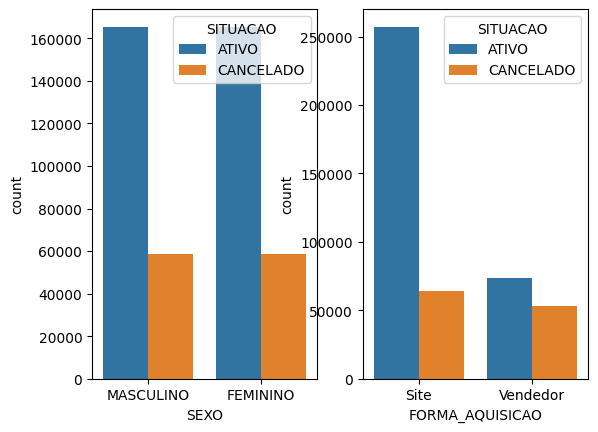

In [ ]:
#análise de todos com a variável target "SITUACAO" para verificar a correlação
f, axes = plt.subplots(1,2)
sns.countplot(data=df, x='SEXO', hue = 'SITUACAO', ax = axes[0])
sns.countplot(data=df, x='FORMA_AQUISICAO', hue = 'SITUACAO', ax = axes[1])
plt.show()



*   Na variável 'SEXO' não observei diferença significativa em relação a variável alvo

*   Na variável 'FORMA_AQUISICAO' observa-se que os clientes que vieram através do site, se mantiveram mais ativos.Enquanto por vendedor,existe quase uma proporção de 50/50 de cancelados e ativos.




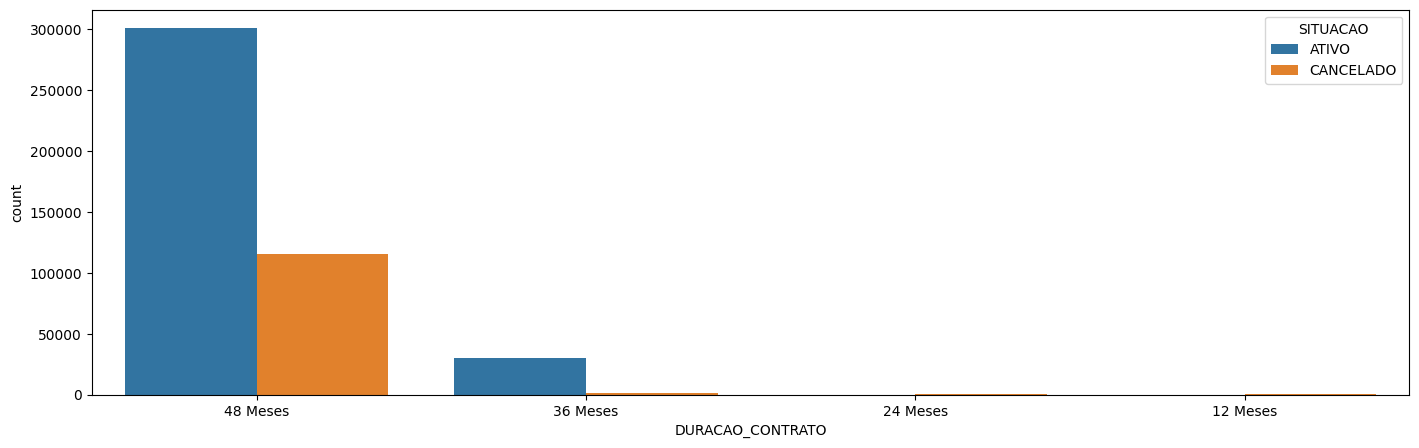

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(data=df, x='DURACAO_CONTRATO', hue = 'SITUACAO')
plt.show()

*   Observei que o plano de '48 Mêses' tem uma maior adesão, e maior contenção de clientes ativos.

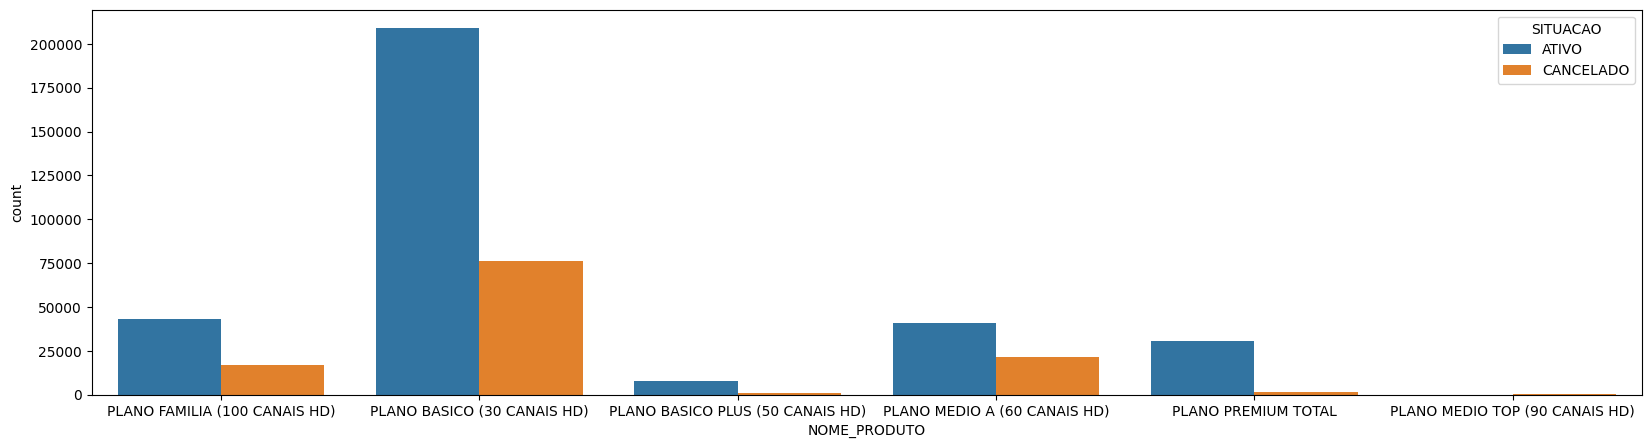

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='NOME_PRODUTO', hue = 'SITUACAO')
plt.show()

*   Nesse caso o 'Plano Básico (30 canais)' tem uma maior adesão, e maior contenção de clientes ativos.

In [ ]:
colunas_numericas = df.select_dtypes(include=['float','int']).columns.tolist()
colunas_numericas.remove('ID_CLIENTE')
colunas_numericas

['IDADE_CLIENTE',
 'QT_FILHOS',
 'DIAS_ATIVO',
 'MESES_ATIVO',
 'VL_PLANO_ADESAO',
 'VL_PLANO_ATUAL',
 'QT_PONTOS_INSTALADOS',
 'QT_PC_PAGAS',
 'QT_PC_VENCIDAS',
 'QT_PC_PAGA_ATRASO',
 'QT_PC_PAGA_EM_DIA',
 'QT_ACORDO_PAGAMENTO',
 'VL_MENSALIDADE_ATRASO',
 'VL_MENSALIDADE_DT_AQUISICAO',
 'VL_MENSALIDADE_DT_ATUAL',
 'COD_SITUACAO']

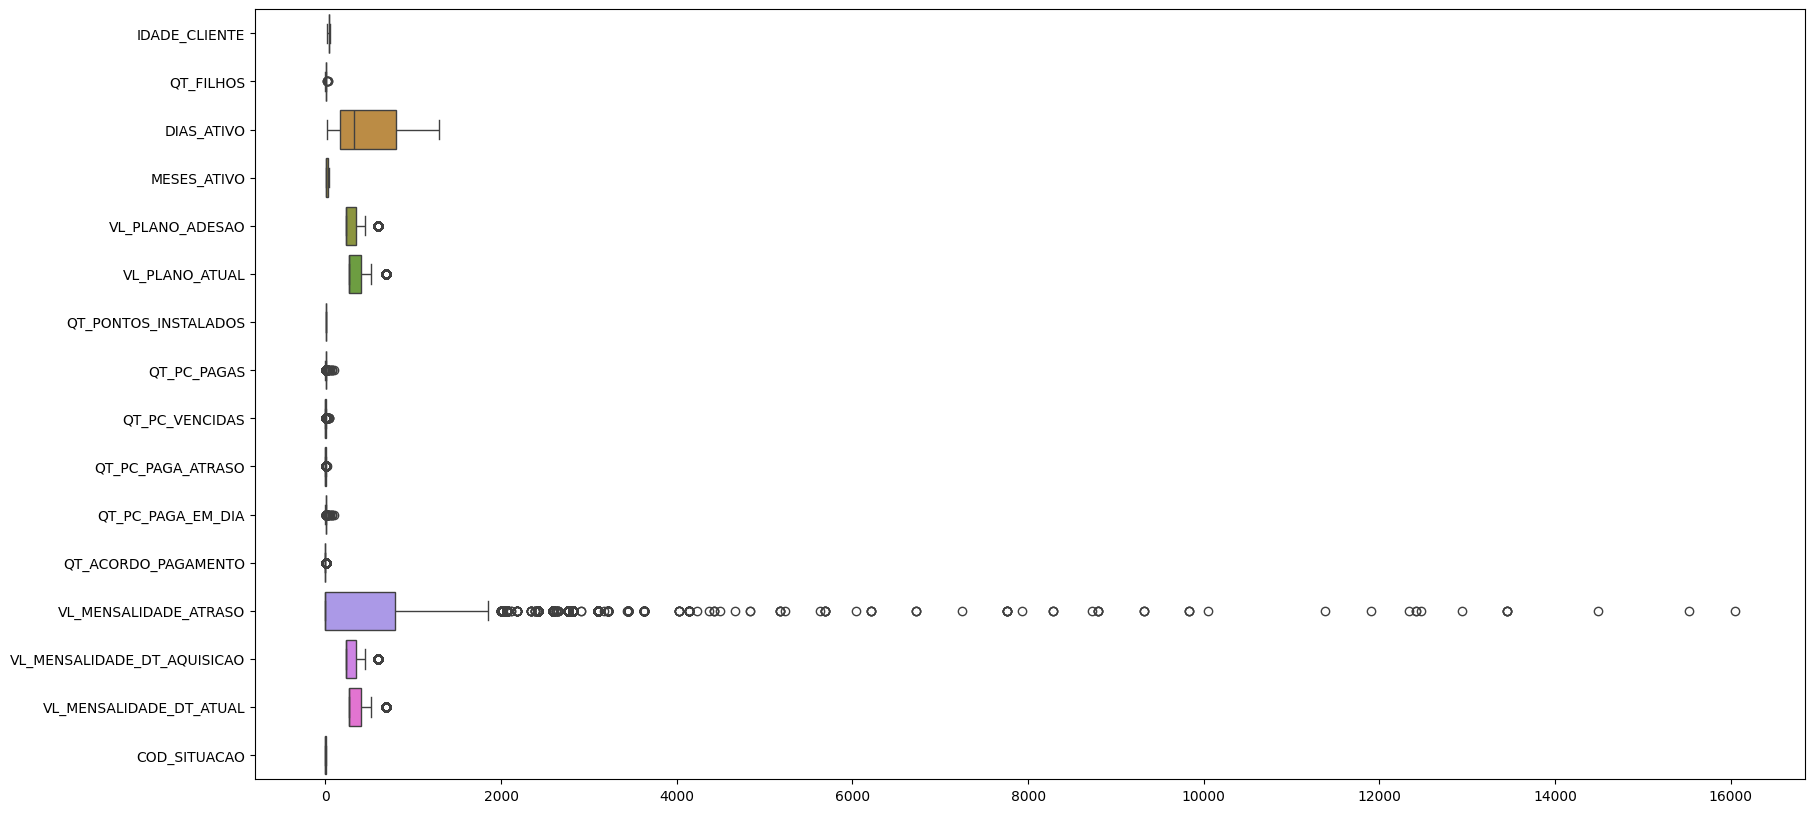

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df[colunas_numericas], orient='h')
plt.show()



*   Como existiam muitos outliers a visualização em apenas um gráfico ficou ruim, vou plotar um boxplot pra cada variável



<Figure size 1400x2400 with 0 Axes>

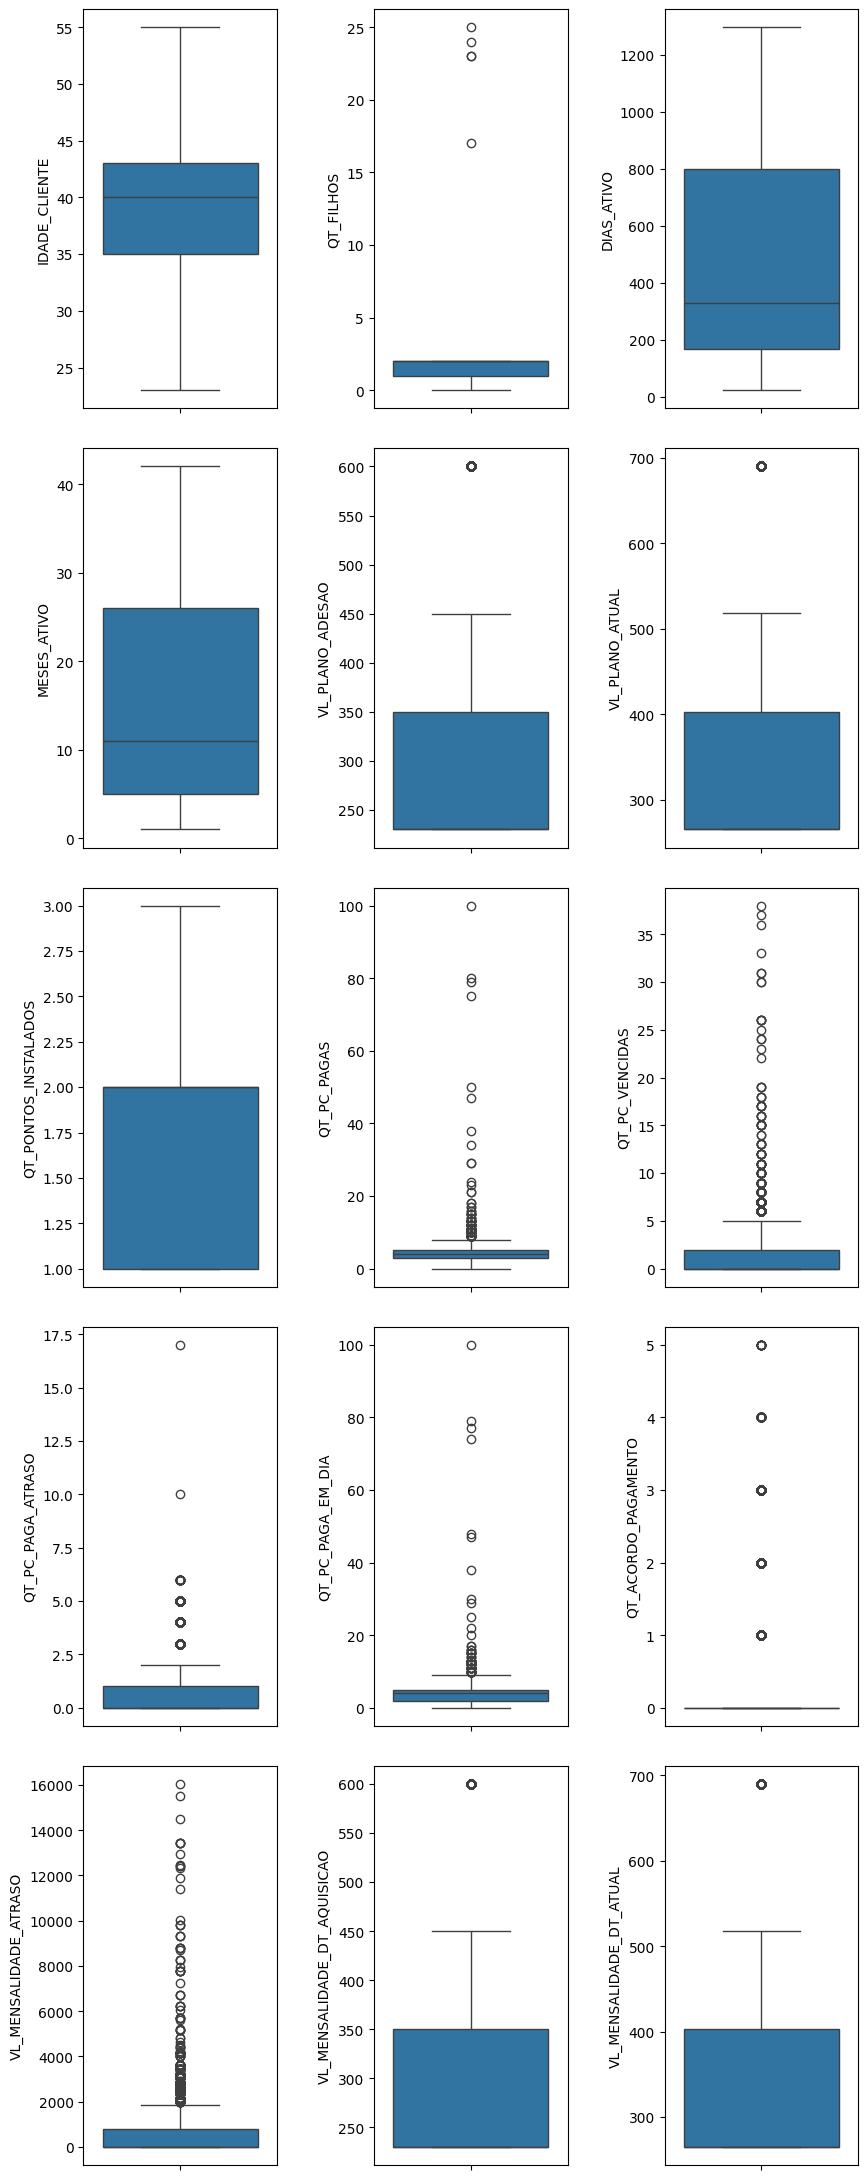

In [ ]:
plt.figure(figsize=(14, 24))
f, axes = plt.subplots(5,3, figsize=(10, 28))
plt.subplots_adjust(hspace=0.1, wspace=0.5)
sns.boxplot(data=df, y='IDADE_CLIENTE', ax = axes[0][0])
sns.boxplot(data=df, y='QT_FILHOS', ax = axes[0][1])
sns.boxplot(data=df, y='DIAS_ATIVO', ax = axes[0][2])
sns.boxplot(data=df, y='MESES_ATIVO', ax = axes[1][0])
sns.boxplot(data=df, y='VL_PLANO_ADESAO', ax = axes[1][1])
sns.boxplot(data=df, y='VL_PLANO_ATUAL', ax = axes[1][2])
sns.boxplot(data=df, y='QT_PONTOS_INSTALADOS', ax = axes[2][0])
sns.boxplot(data=df, y='QT_PC_PAGAS', ax = axes[2][1])
sns.boxplot(data=df, y='QT_PC_VENCIDAS', ax = axes[2][2])
sns.boxplot(data=df, y='QT_PC_PAGA_ATRASO', ax = axes[3][0])
sns.boxplot(data=df, y='QT_PC_PAGA_EM_DIA', ax = axes[3][1])
sns.boxplot(data=df, y='QT_ACORDO_PAGAMENTO', ax = axes[3][2])
sns.boxplot(data=df, y='VL_MENSALIDADE_ATRASO', ax = axes[4][0])
sns.boxplot(data=df, y='VL_MENSALIDADE_DT_AQUISICAO', ax = axes[4][1])
sns.boxplot(data=df, y='VL_MENSALIDADE_DT_ATUAL', ax = axes[4][2])
plt.show()

Observações:

*  Existem outliers no gráfico 'QT_FILHOS'

*  Os outliers em 'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'QT_PC_VENCIDAS, 'VL_MENSALIDADE_DT_AQUISICAO' e 'VL_MENSALIDADE_DT_ATUAL' não são outliers verdadeiros, porque estão dentro do limite aceitável de valores, porém os valores mais altos tem menor frequência em relação aos outros, aparecendo então como outliers.           


*  Nos gráficos de 'QT_PC_PAGAS' E 'QT_PC_PAGA_EM_DIA" aparecem outliers verdadeiros, pois contém valores de mêses, acima da quantidade máxima de mêses possível, que é 48 mêses.



#    Tratando Outliers





In [ ]:
filhos = df['QT_FILHOS'].value_counts()
filhos

QT_FILHOS
2.0     235825
1.0     212353
0.0         10
23.0         2
17.0         1
24.0         1
25.0         1
Name: count, dtype: int64

In [ ]:
df_dados = df.copy()
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0


In [ ]:
df_dados = df_dados.loc[df_dados['QT_FILHOS'] <= 2]
filhos = df_dados['QT_FILHOS'].value_counts()
filhos

QT_FILHOS
2.0    235825
1.0    212353
0.0        10
Name: count, dtype: int64





*   Transformando a coluna 'DURACAO_CONTRATO' em numérica





In [ ]:
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['12 Meses'], 12)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['24 Meses'], 24)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['36 Meses'], 36)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['48 Meses'], 48)

*   Tratando os valores outliers de 'QT_PC_PAGA_EM_DIA' e 'QT_PC_PAGAS', o valor máximo que essa coluna pode ter é de 48 meses, então registros que possuírem quantidades superiores a essa duração de contrato, iremos substituir pela duração máxima de contrato.

In [ ]:
df_dados.loc[df_dados['QT_PC_PAGA_EM_DIA'] > df_dados['DURACAO_CONTRATO'], 'QT_PC_PAGA_EM_DIA'] = df_dados['DURACAO_CONTRATO']
df_dados.loc[df_dados['QT_PC_PAGAS'] > df_dados['DURACAO_CONTRATO'], 'QT_PC_PAGAS'] = df_dados['DURACAO_CONTRATO']

print(df_dados['QT_PC_PAGA_EM_DIA'].max())
print(df_dados['QT_PC_PAGAS'].max())

48
48


# Tratando Valores Nulos

In [ ]:
df_dados['QT_FILHOS'] = df_dados['QT_FILHOS'].fillna((df_dados['QT_FILHOS'].median()))
df_dados.isnull().sum()

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                           0
DT_AQUISICAO                        0
DT_CANCELAMENTO                330987
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64

In [ ]:
df_tratados = df_dados.copy()
df_tratados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0


In [ ]:
colunas_categoricas

['FORMA_AQUISICAO',
 'SEXO',
 'DT_AQUISICAO',
 'DT_CANCELAMENTO',
 'DURACAO_CONTRATO',
 'NOME_PRODUTO',
 'SITUACAO']

# Codificando as variáveis categóricas

In [ ]:
lb = LabelEncoder()
df_tratados['FORMA_AQUISICAO'] = lb.fit_transform(df_tratados['FORMA_AQUISICAO'])
df_tratados['SEXO'] = lb.fit_transform(df_tratados['SEXO'])
df_tratados['NOME_PRODUTO'] = lb.fit_transform(df_tratados['NOME_PRODUTO'])


# Dropando Colunas

In [ ]:
df_tratados.drop('DT_AQUISICAO', axis=1, inplace=True)
df_tratados.drop('DT_CANCELAMENTO', axis=1, inplace=True)
df_tratados.drop('SITUACAO', axis=1, inplace=True)

In [ ]:
df_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448188 non-null  int64  
 1   FORMA_AQUISICAO              448188 non-null  int64  
 2   IDADE_CLIENTE                448188 non-null  int64  
 3   SEXO                         448188 non-null  int64  
 4   QT_FILHOS                    448188 non-null  float64
 5   DIAS_ATIVO                   448188 non-null  int64  
 6   MESES_ATIVO                  448188 non-null  int64  
 7   DURACAO_CONTRATO             448188 non-null  int64  
 8   VL_PLANO_ADESAO              448188 non-null  int64  
 9   VL_PLANO_ATUAL               448188 non-null  int64  
 10  NOME_PRODUTO                 448188 non-null  int64  
 11  QT_PONTOS_INSTALADOS         448188 non-null  int64  
 12  QT_PC_PAGAS                  448188 non-null  int64  
 13  QT_P

# Pré Processamento e Modelagem

*   Separação dos dados

In [43]:
X = df_tratados.iloc[: , 0:20]
y = df_tratados.iloc[: , 20]

y.head()

0    0
1    0
2    0
4    0
5    0
Name: COD_SITUACAO, dtype: int64

In [44]:
len(y)

448188

In [45]:
X.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL
0,1,0,23,1,0.0,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518
1,2,1,24,0,0.0,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265
2,3,0,25,1,0.0,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334
4,5,1,27,1,0.0,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265
5,6,1,28,0,1.0,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265


*   Usando o Balanceador



*   Aqui eu criei um balanceador, e chamei o método 'fit resemple', para reamostrar os dados, e criar um conjunto de dados maior. Balanceando os valores da variável target.



In [46]:
balanceador = SMOTE()
X_res, y_res = balanceador.fit_resample(X, y)

In [47]:
X.shape

(448188, 20)

In [48]:
X_res.shape

(661974, 20)



*   Divisão dos dados para treino e teste

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

*   Criação do modelo preditivo

In [61]:
kVals = range(3, 8, 2) #coloquei os números dos vizinhos num range de 3 a 8, indo de 2 em 2 valores.
acuracias = []

#Vou criar um 'for' que vai treinar, avaliar e informar o score de 3 modelos dentro do range que predefini

for k in kVals:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)

    score = modelo.score(X_test, y_test)
    print("k=", k, "A acurácia é de =", score* 100)
    acuracias.append(score)

k= 3 A acurácia é de = 99.99496457579069
k= 5 A acurácia é de = 99.99496457579069
k= 7 A acurácia é de = 99.99345394852789


In [66]:
# obtendo o valor de'k' que teve a maior acurácia
i = np.argmax(acuracias)
# criando a versão final do modelo com maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors= kVals[i])
modeloFinal.fit(X_train, y_train)
y_pred  = modeloFinal.predict(X_test)

print('A acurácia do modelo é de: ', accuracy_score(y_test, y_pred))

A acurácia do modelo é de:  0.9999496457579069


*   Criando um dataframe com as previsões

In [53]:
base_teste = pd.DataFrame(X_test)
base_teste['Previsão'] = y_pred
base_teste.shape

(198593, 22)

In [60]:
df_com_previsões = base_teste.copy()
df_com_previsões['Previsão'] = np.where(df_com_previsões['Previsão'] == 0, 'Ativo', 'Cancelado')
df_com_previsões.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,Previsão
380609,380615,0,41,1,1.0,153,5,48,230,265,0,1,6,0,0,6,1,0,230,265,Ativo
558428,140401,1,35,0,2.0,165,5,48,230,265,0,1,4,1,2,2,0,265,230,265,Cancelado
52613,52619,1,35,1,2.0,440,14,48,230,265,0,2,5,0,1,4,0,0,230,265,Ativo
366400,366406,0,38,0,2.0,414,13,48,230,265,0,2,5,0,0,5,1,0,230,265,Ativo
70959,70965,1,43,1,1.0,191,6,48,350,403,3,2,5,0,1,4,1,0,350,403,Ativo
